 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns and creating a dataframe with sorted index
whales_returns = Path("./Resources/whale_returns.csv")
whales_returns_df = pd.read_csv(whales_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whales_returns_df = whales_returns_df.sort_index()
whales_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whales_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_returns_df = whales_returns_df.dropna()
whales_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns and creating a dataframe with sorted index
algo_returns = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices and creating a dataframe with sorted index
sp500_history = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types by removing $ and changing values to float & index to datetime type
sp500_history_df["Close"] = sp500_history_df["Close"].replace("[$,]", "", regex=True).astype(float)
sp500_history_df.index = pd.to_datetime(sp500_history_df.index)
print(sp500_history_df.dtypes, sp500_history_df.index)
sp500_history_df.head()

Close    float64
dtype: object DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-22', '2019-04-23'],
              dtype='datetime64[ns]', name='Date', length=1649, freq=None)


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [12]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()
sp500_returns_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "SP500"})
sp500_returns_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whales_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
all_returns_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Data'}, xlabel='Year-Month', ylabel='% Change'>

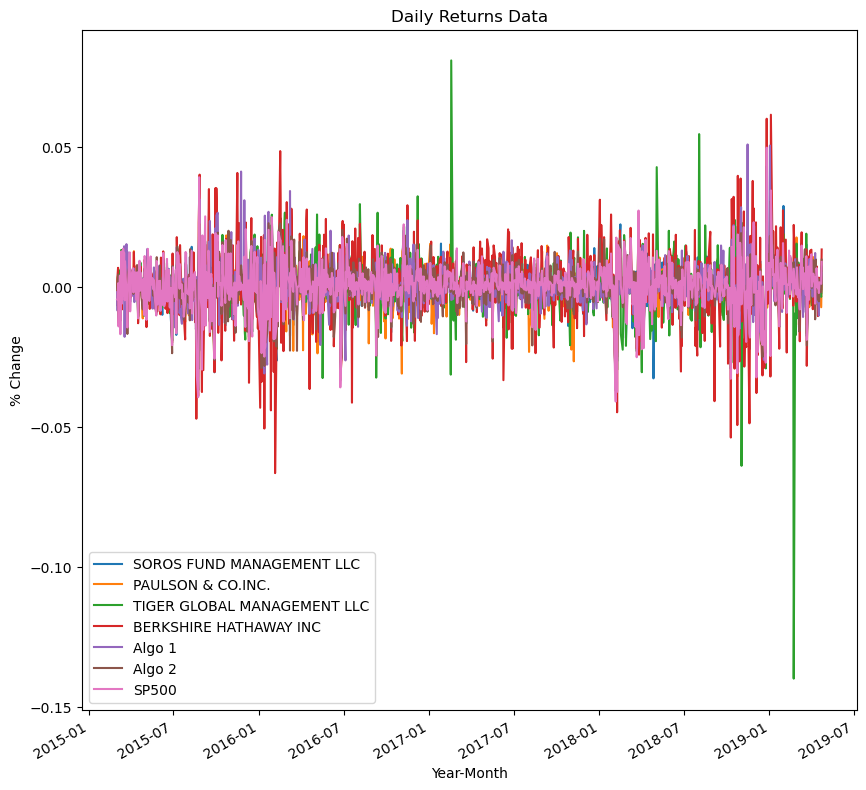

In [15]:
# Plot daily returns of all portfolios
all_returns_df.plot(figsize=(10,10), title="Daily Returns Data", xlabel="Year-Month", ylabel="% Change")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns Data'}, xlabel='Year-Month', ylabel='% Change'>

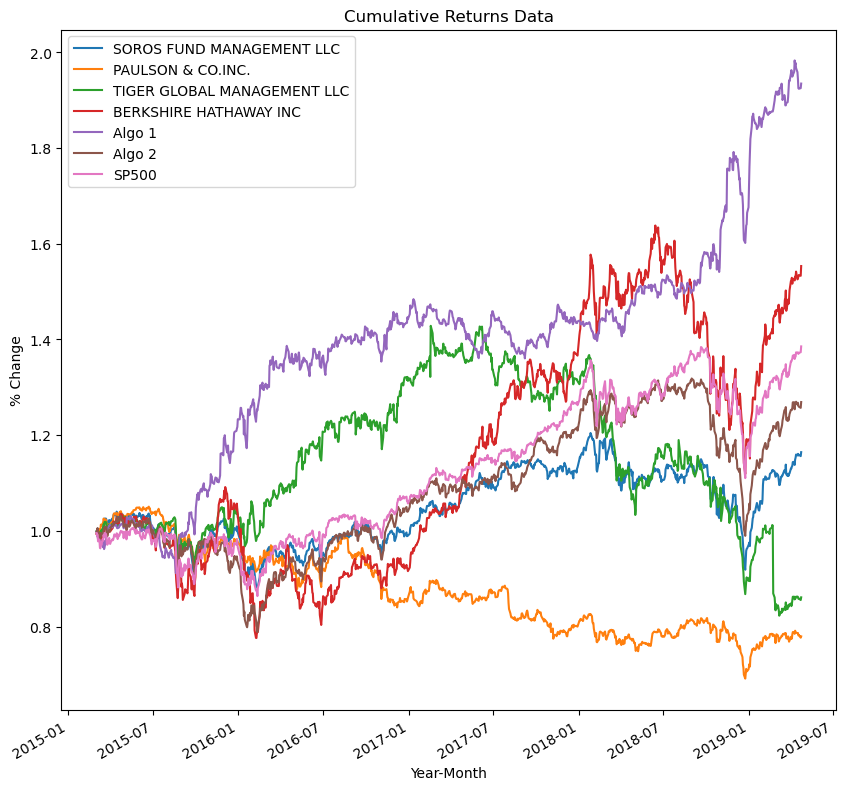

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,10), title="Cumulative Returns Data", xlabel="Year-Month", ylabel="% Change")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Risk Box Plot Data'}, ylabel='% Change'>

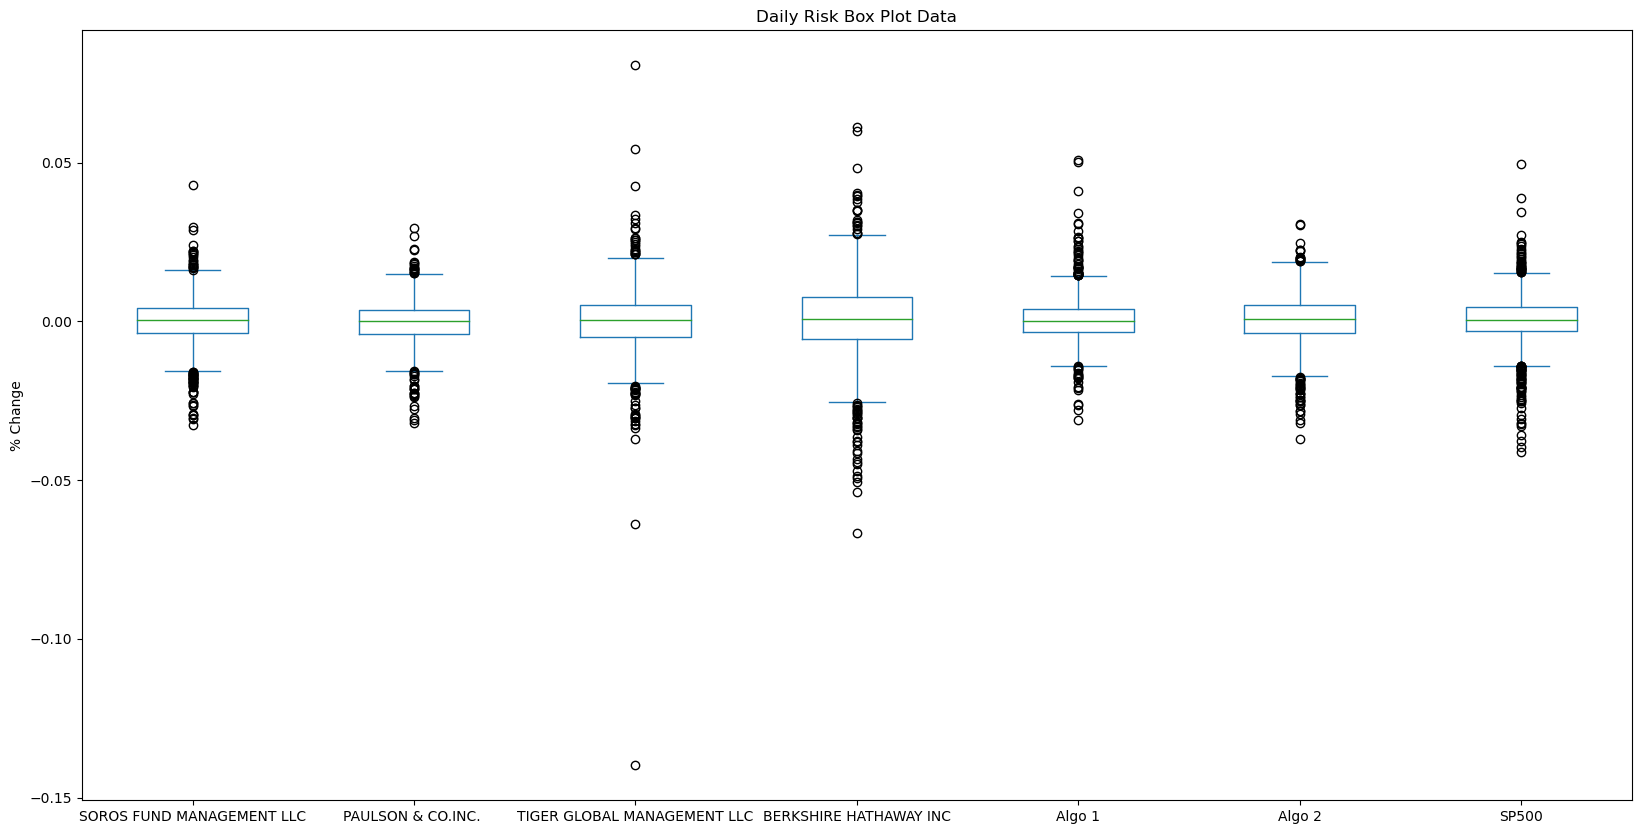

In [17]:
# Box plot to visually show risk
all_returns_df.plot.box(figsize=(20,10), title="Daily Risk Box Plot Data", ylabel="% Change")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_std = all_returns_df.std()
all_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = all_returns_df["SP500"].std()
# Determine which portfolios are riskier than the S&P 500
risky_portfolios = all_returns_df.std() > sp500_risk
risky_portfolios.sort_values(ascending=False)

TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_all_std = all_returns_df.std() * np.sqrt(252)
annual_all_std.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day Standard Deviation Data'}, xlabel='Year-Month', ylabel='Standard Deviation'>

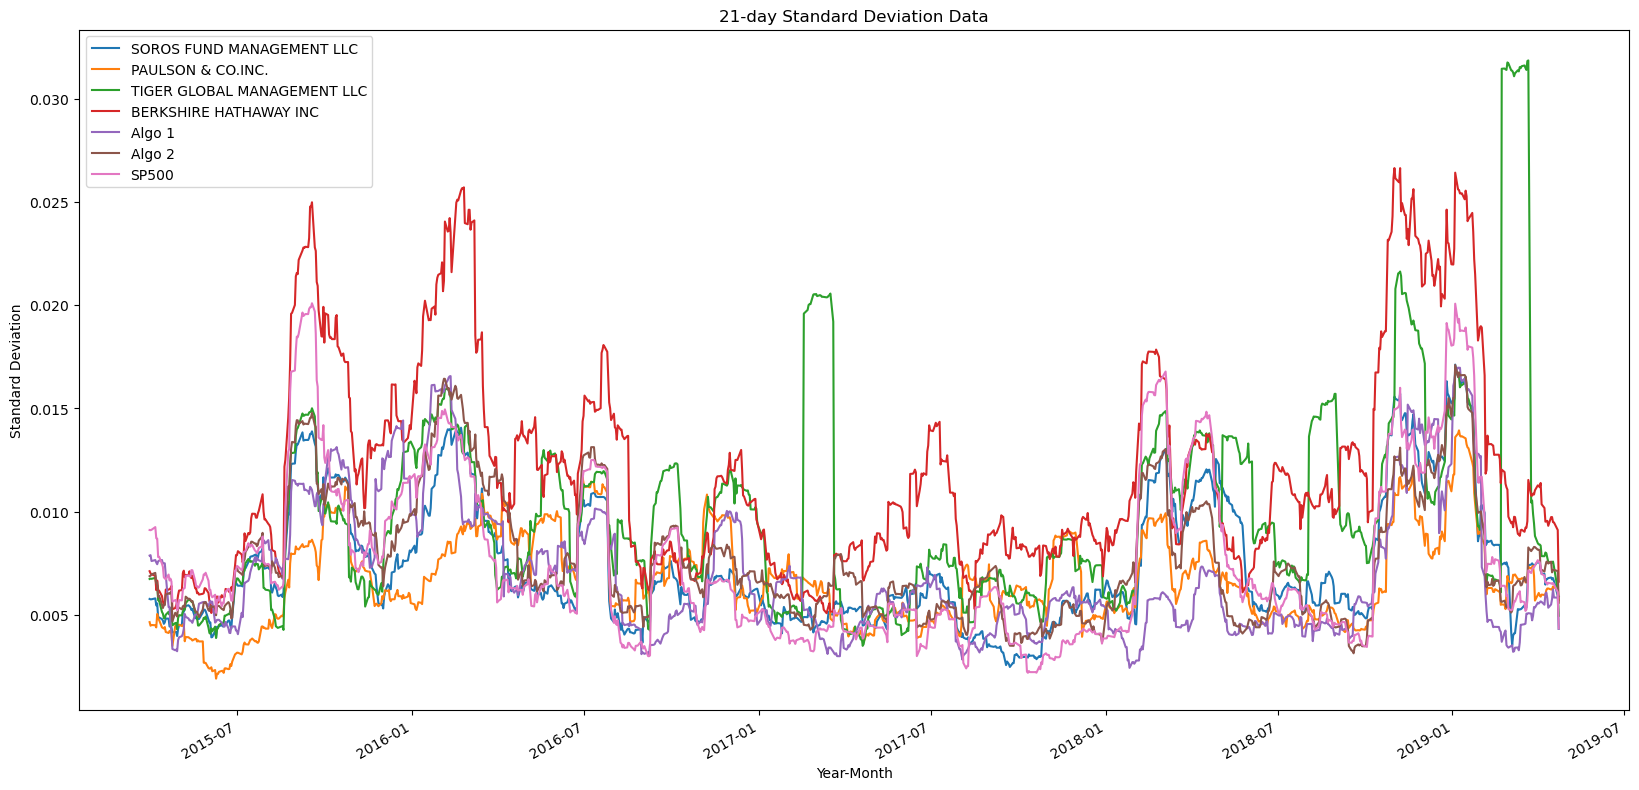

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_std = all_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
all_rolling_std.plot(figsize=(20, 10), title="21-day Standard Deviation Data", xlabel="Year-Month", ylabel="Standard Deviation")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
all_corr = all_returns_df.corr()
# Display de correlation matrix
all_corr.style.background_gradient(cmap="coolwarm")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'21-Day Algo 1 Portfolio Beta'}, xlabel='Year-Month', ylabel='Beta'>

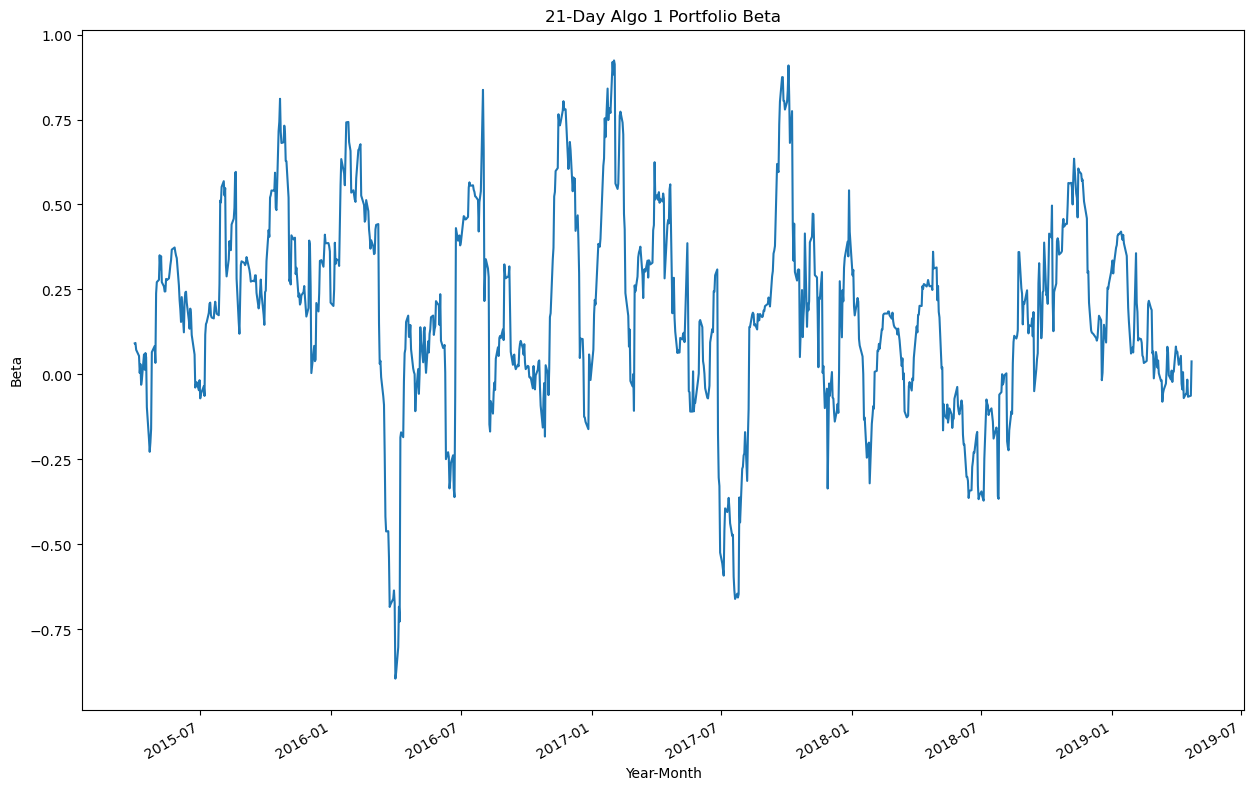

In [23]:
##### I decided to do a rolling 21 day rolling covariance, variance, and beta since you cannot plot a single value.
# Calculate covariance of a single portfolio
algo1_covariance = all_returns_df["Algo 1"].rolling(21).cov(all_returns_df["SP500"])
# Calculate variance of S&P 500
sp500_variance = all_returns_df["SP500"].rolling(21).var()
# Computing beta
algo1_beta = algo1_covariance / sp500_variance

# Plot beta trend
algo1_beta.plot(figsize=(15, 10), title="21-Day Algo 1 Portfolio Beta", xlabel="Year-Month", ylabel="Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'21-day Half Life Exponentially Weighted Average'}, xlabel='Year-Month', ylabel='Exp Weighted Avg'>

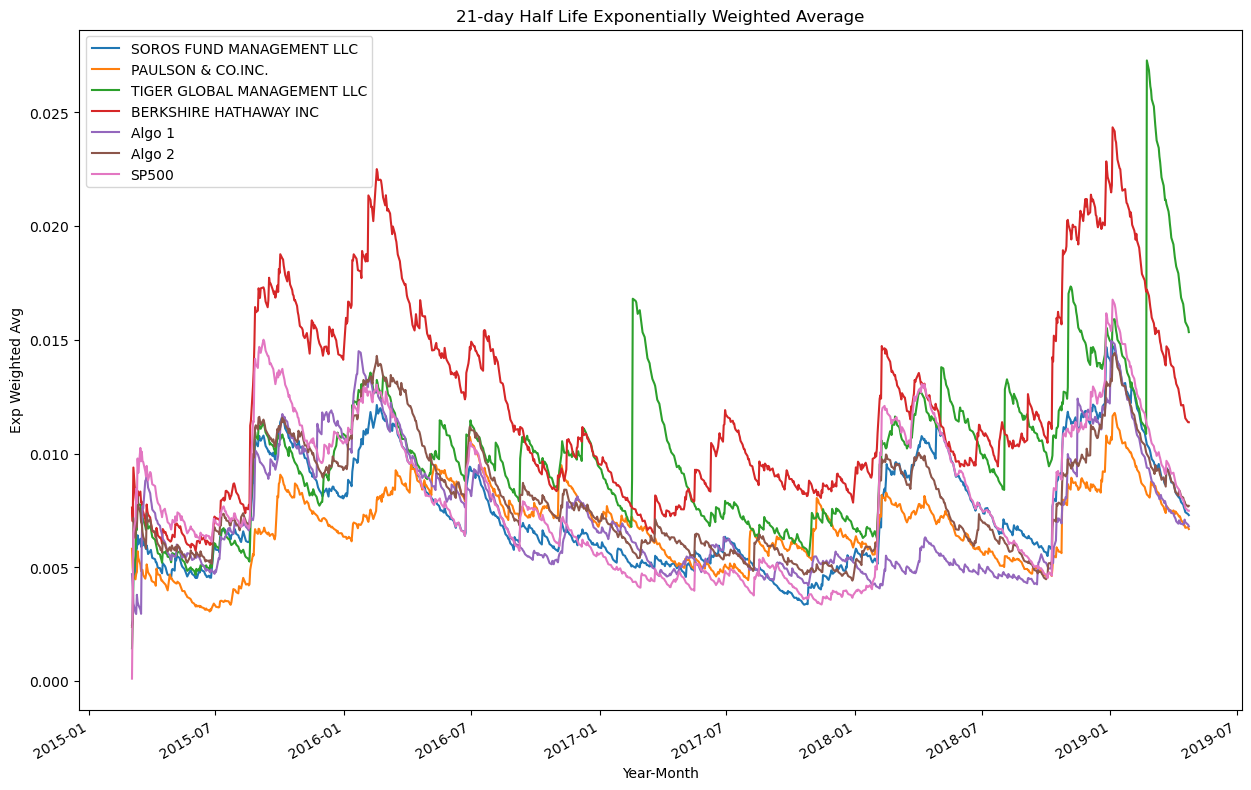

In [24]:
# Use `ewm` to calculate the rolling window
all_returns_df.ewm(halflife=21).std().plot(figsize=(15, 10), title="21-day Half Life Exponentially Weighted Average", xlabel="Year-Month", ylabel="Exp Weighted Avg")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
annualized_sharpe = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}, ylabel='Sharpe Ratio'>

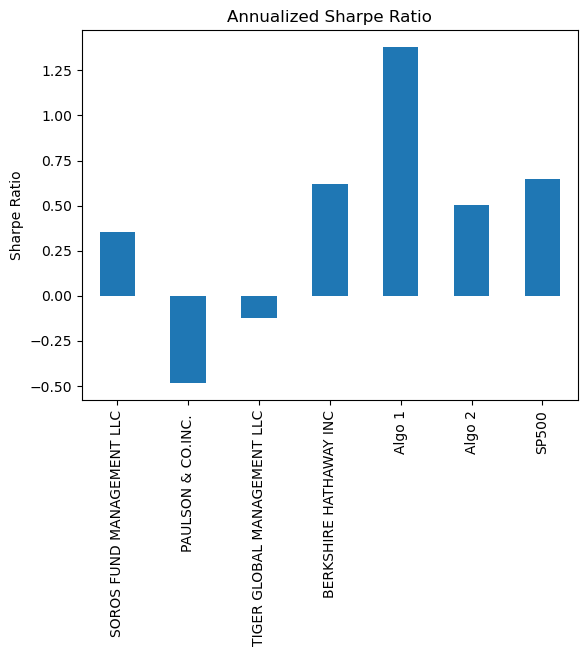

In [26]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind="bar", title="Annualized Sharpe Ratio", ylabel="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algo 1 outperforms all the whales and SP500 market portfolios. It has the least correlation, most cumulative returns, and the highest sharpe ratio during 2015-2019. However, Algo 2 is highly correlated to the Soros and the SP500 portfolios and does not perform as well as Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock and creating a dataframe with sorted index, also renaming NOCP clumn to stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_data_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_data_df.rename(columns = {"NOCP":"AAPL"}, inplace = True)
aapl_data_df = aapl_data_df.sort_index()
aapl_data_df.head()

,Symbol,AAPL
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [28]:
# Reading data from 2nd stock and creating a dataframe with sorted index, also renaming NOCP clumn to stock
goog_data = Path("./Resources/goog_historical.csv")
goog_data_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_data_df.rename(columns = {"NOCP":"GOOG"}, inplace = True)
goog_data_df = goog_data_df.sort_index()
goog_data_df.head()

,Symbol,GOOG
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [29]:
# Reading data from 3rd stock and creating a dataframe with sorted index, also renaming NOCP clumn to stock
cost_data = Path("./Resources/cost_historical.csv")
cost_data_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_data_df.rename(columns = {"NOCP":"COST"}, inplace = True)
cost_data_df = cost_data_df.sort_index()
cost_data_df.head()

,Symbol,COST
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [30]:
# Combine all stocks in a single DataFrame without the symbol column
all_stocks_df = pd.concat([aapl_data_df["AAPL"], goog_data_df["GOOG"], cost_data_df["COST"]], axis="columns", join="inner")
all_stocks_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [31]:
# Reset Date index
###### Not sure why this is a step, not able to calculate pct_change with DateTime (TypeError: cannot perform __truediv__ with this index type: DatetimeArray)
# all_stocks_df = all_stocks_df.reset_index()
# all_stocks_df.head()

In [32]:
# Reorganize portfolio data by having a column per symbol
###### already reorganized with earlier steps
all_stocks_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [33]:
# Calculate daily returns
all_stocks_returns_df = all_stocks_df.pct_change()
# Drop NAs
all_stocks_returns_df = all_stocks_returns_df.dropna()
# Display sample data
all_stocks_returns_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
stock_portfolio_returns = all_stocks_returns_df.dot(weights)
# Display sample data
stock_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame and rename the stocks column
all_portfolios_returns = pd.concat([all_returns_df, stock_portfolio_returns], axis="columns", join="inner")
all_portfolios_returns.rename(columns={0: "Stocks"}, inplace=True)
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Stocks
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Stocks                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
all_portfolios_annual_std = all_portfolios_returns.std() * np.sqrt(252)
all_portfolios_annual_std.sort_values()

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
SP500                          0.152054
Stocks                         0.211496
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day Standard Deviation'}, xlabel='Year-Month', ylabel='Standard Deviation'>

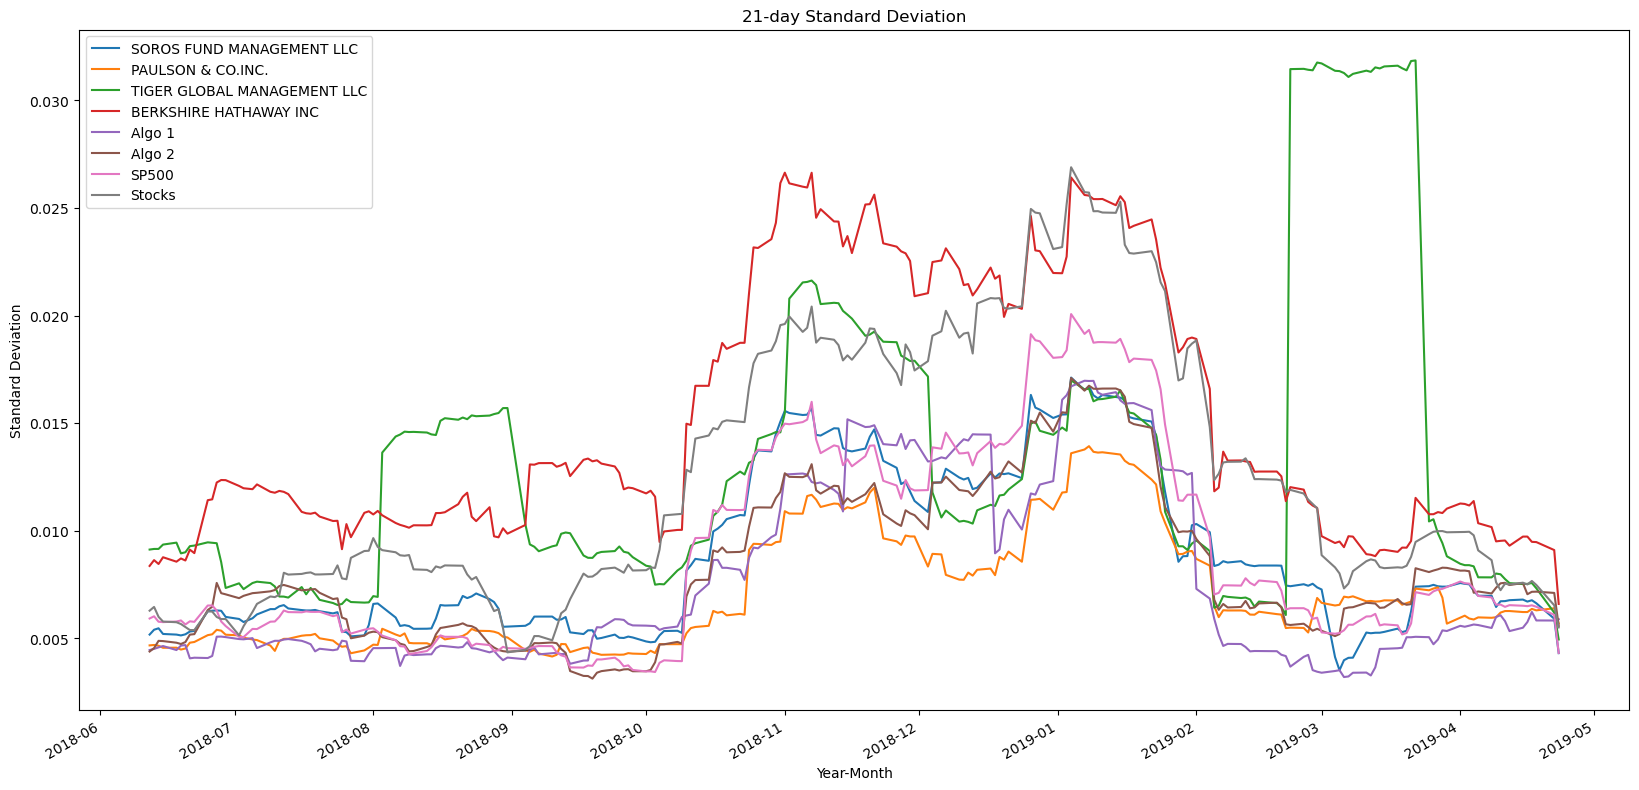

In [38]:
# Calculate rolling standard deviation
all_portfolios_rolling_std = all_portfolios_returns.rolling(21).std()
# Plot rolling standard deviation
all_portfolios_rolling_std.plot(figsize=(20,10), title="21-day Standard Deviation", ylabel="Standard Deviation", xlabel="Year-Month")

### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
all_portfolios_corr = all_portfolios_returns.corr()
all_portfolios_corr.style.background_gradient(cmap="coolwarm")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Stocks
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Stocks,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Stocks Portfolio Beta'}, xlabel='Year-Month', ylabel='Beta'>

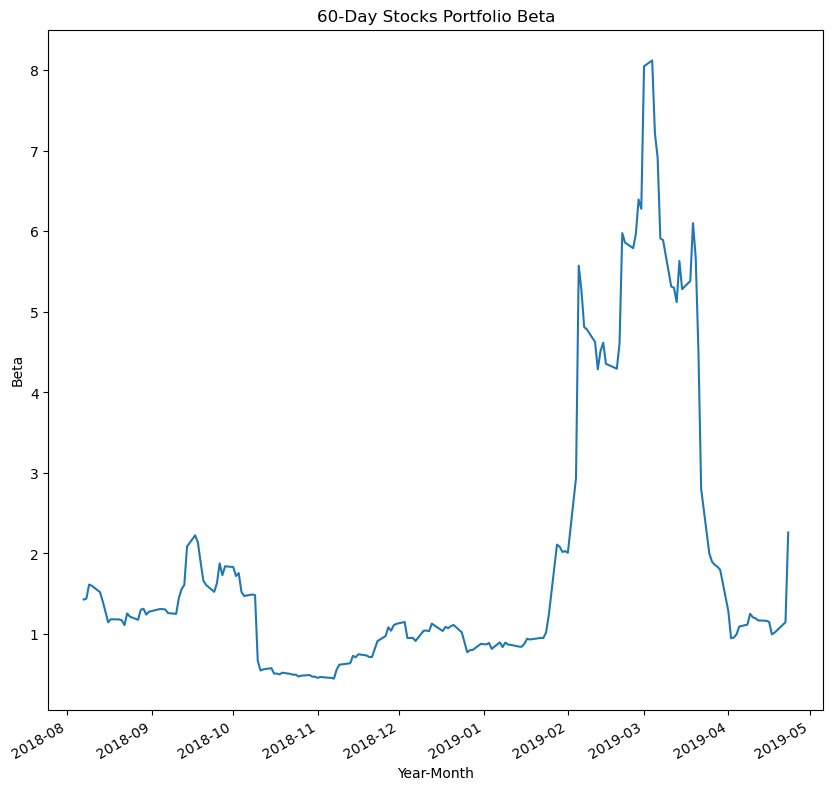

In [40]:
# Calculate and plot Beta
stocks_covariance = all_portfolios_returns["Stocks"].rolling(60).cov(all_portfolios_returns["SP500"])
stocks_beta = stocks_covariance / sp500_variance

# Plot beta trend
stocks_beta.plot(figsize=(10, 10), title="60-Day Stocks Portfolio Beta", xlabel="Year-Month", ylabel="Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
all_portfolios_annual_sharpe = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'All Portfolios Annualized Sharpe Ratio'}, ylabel='Sharpe Ratio'>

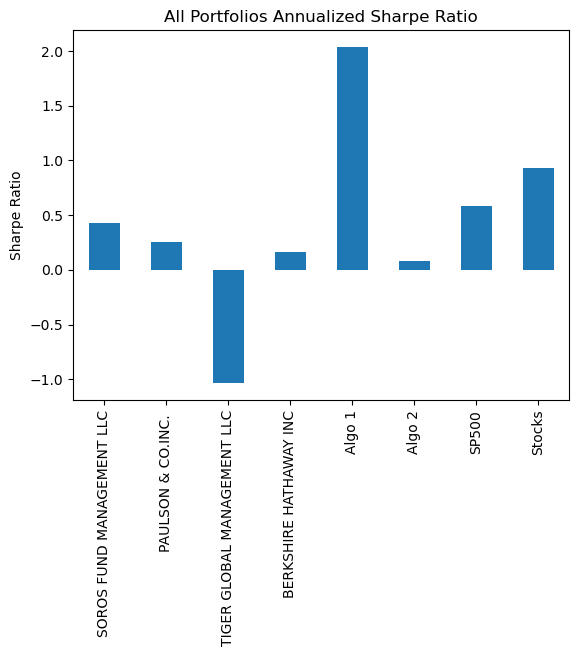

In [42]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_annual_sharpe.plot(kind="bar", title="All Portfolios Annualized Sharpe Ratio", ylabel="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

My stock portfolios has a high annualiazed standard deviation of 0.211496 only lower than 2 other portfolios, it is highly correlated with the SP500 and Bershire portfolios, the 60-day rolling beta shot up in the first quarter of 2019 peaking at 8, and the annualized sharpe ratio is about 1 only trailing the Algo 1 portfolio which is at 2. My stock portfolio performed well compared to the rest, with the exception of Algo 1, but it was more volatile than most portfolios.